In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import anndata as ad
import scanpy as sc

In [20]:
ss_pth = "../data/mouse-hippocampus/curated/hippo-slide_seq.h5ad"

In [21]:
adata = ad.read_h5ad(ss_pth)

In [25]:
np.array(adata.X.todense()).sum(axis=1)

array([2.3772e+04, 1.9661e+04, 1.5999e+04, ..., 1.0000e+01, 1.0000e+01,
       1.0000e+01], dtype=float32)

In [ ]:
crd = adata.obsm["spatial"]
lmk_crd = adata.uns["curated_landmarks"]
vals = np.array(adata.X.todense()).sum(axis=1).flatten()
ordr = np.argsort(vals)

In [48]:
new_lmk_crd = np.vstack((lmk_crd[0:2,],np.array([730,1470]),lmk_crd[2::]))
adata.uns["curated_landmarks"] = pd.DataFrame(new_lmk_crd,
                                              columns = ["xcoord","ycoord"],
                                              index  = ["Landmark_{}".format(k) for k in range(new_lmk_crd.shape[0])],
                                             )

In [50]:
adata.write_h5ad(ss_pth)

In [41]:
x = 730
y = 1470

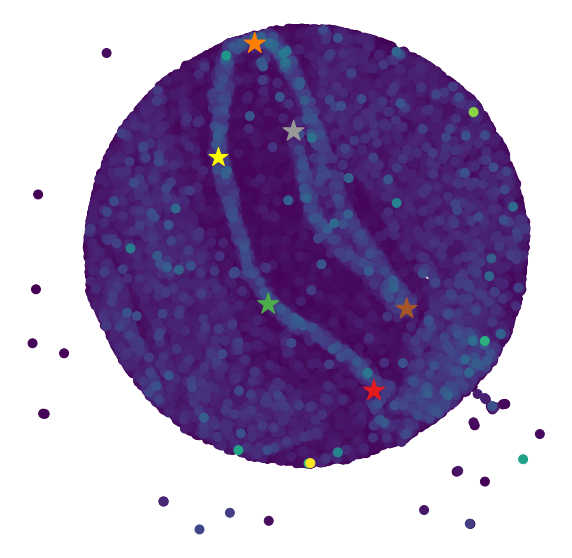

In [42]:
plt.figure(figsize = (10,10))
plt.scatter(crd[ordr,0],crd[ordr,1],c = vals[ordr],cmap = plt.cm.viridis, s = 80)
plt.scatter(lmk_crd[:,0],lmk_crd[:,1],cmap = plt.cm.Set1, s = 500,marker = "*",c = np.arange(len(lmk_crd)))
plt.scatter(x,y,c = "yellow",marker ="*",s = 400)


plt.axis("off")
plt.axis("equal")
plt.show()